# Projeto: análise estatística de dados de CPU

## Instalação de dependências

In [ ]:
from modules import setup

setup.install_dependencies()


## Leitura do data set

In [2]:
from modules import data

file_data = data.read_data('../docs/project_material/data_set_group_0.txt')

data_set = data.format(file_data)

## Teste de Hipótese - É uma distribuição normal

### Teste Gráfico Q-Q

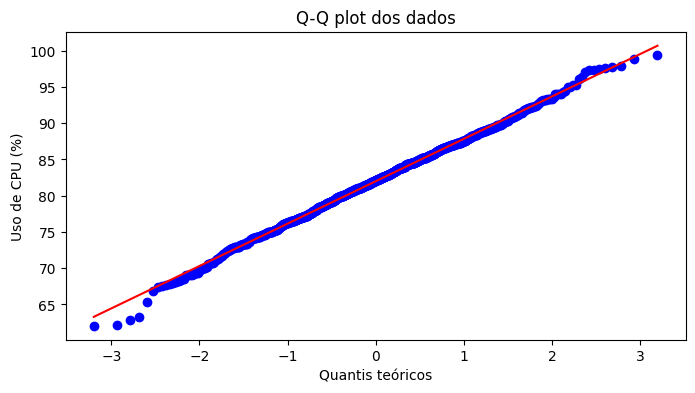

In [3]:
from modules import normal_test

qq_plt = normal_test.qq_plot(data_set)

É uma distribuição normal se os pontos tendem a se posicionar seguindo a linha.

### Teste através do p-value

In [4]:
alpha = 0.05
statistic, p_value = normal_test.normal_hypothesis_test(data_set)

if p_value > alpha:
    print(f'Há evidências suficientes, ao nível de significância de 5%, para confirmar que os dados são normalmente distribuídos, pois o p-value dos dados é de {p_value:.4f} e é maior que o alpha ({alpha}).')
else:
    print(f'Não há evidências suficientes, ao nível de significância de 5%, para confirmar que os dados são normalmente distribuídos, pois o p-value dos dados é de {p_value:.4f} e é menor que o alpha ({alpha}).')

Há evidências suficientes, ao nível de significância de 5%, para confirmar que os dados são normalmente distribuídos, pois o p-value dos dados é de 0.1767 e é maior que o alpha (0.05).


## Análise Descritiva

### Medidas de centralidade e de dispersão

#### Média

In [5]:
from modules import measure_centrality

mean = measure_centrality.get_mean(data_set)

mean

81.9883212

#### Mediana

In [6]:
median = measure_centrality.get_median(data_set)

median

82.14005

#### Moda

In [7]:
mode = measure_centrality.get_mode(data_set)

mode

82.5835

#### Desvio Padrão

In [8]:
standard_deviation = measure_centrality.get_standard_deviation(data_set)

standard_deviation

5.841293166240205

#### Variância

In [9]:
variance = measure_centrality.get_variance(data_set)

variance

34.12070585396452

#### Coeficiente de Variação

In [10]:
coefficient_variation = measure_centrality.get_coefficient_variation(standard_deviation, mean)

coefficient_variation

0.07124542960199318

#### Quartis

In [11]:
quartiles = measure_centrality.get_quartiles(data_set)

quartiles

array([78.083175, 82.14005 , 85.8768  , 99.4721  ])

#### Curtose

In [12]:
curtose = measure_centrality.get_kurtosis(data_set)

curtose

0.2015768131773683

#### Teste de Hipótese

In [13]:
import math
import scipy.stats as stats

x_bar = mean
u = 70
std = standard_deviation
n = 1000
alpha = 0.05

# tipos possíveis: "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "right-tailed"

if tail_hypothesis_type == "left-tailed":
    critical_value = stats.norm.ppf(alpha)
elif tail_hypothesis_type == "right-tailed":
    critical_value = stats.norm.ppf(1 - alpha)
else:
    critical_value = stats.norm.ppf(alpha/2)


print("One-Sample", tail_hypothesis_type, "Z-test of true mean")
print("--------------------------------------------------------------------------------------")

if n >= 30:
    print("Tamanho da Amostra >= 30, CLT ")
    z_score = (x_bar - u)/(std/math.sqrt(n))
    critical_value = stats.norm.ppf(alpha)
    
    conclusion = "Falha ao rejeitar a hipótese nula"
    if tail_hypothesis_type == "left-tailed":
        if z_score < critical_value:
            conclusion = "Hipótese Nula foi rejeitada"
    elif tail_hypothesis_type == "right-tailed":
        critical_value = abs(critical_value)
        if z_score > critical_value:
            conclusion = "Hipótese Nula foi rejeitada"
    else:
        z_score = abs(z_score) 
        critical_value = abs(critical_value)
        if z_score > critical_value:
            conclusion = "Hipótese Nula foi rejeitada"

    print("z-score is:", z_score, " and critical value is:", critical_value)
    print(conclusion)
else:
    print("CLT não foi satisfeita")

One-Sample right-tailed Z-test of true mean
--------------------------------------------------------------------------------------
Tamanho da Amostra >= 30, CLT 
z-score is: 64.90069790159892  and critical value is: 1.6448536269514729
Hipótese Nula foi rejeitada


#### Gráfico do Teste de Hipótese

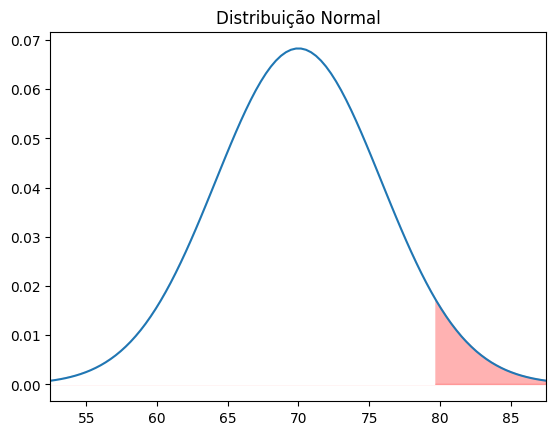

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


mu = 70
sigma = standard_deviation

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

y = norm.pdf(x, mu, sigma)

plt.plot(x, y)

plt.xlim(mu - 3*sigma, mu + 3*sigma)

x1 = np.linspace(mu + 3*sigma, -1.645*sigma, 100)
x2 = np.linspace(79.62, 1.645*sigma, 100)
y1 = norm.pdf(x1, mu, sigma)
y2 = norm.pdf(x2, mu, sigma)
plt.fill_between(x1, y1, color='red', alpha=.3)
plt.fill_between(x2, y2, color='white', alpha=1)

plt.title('Distribuição Normal')

plt.show()


### Boxplot

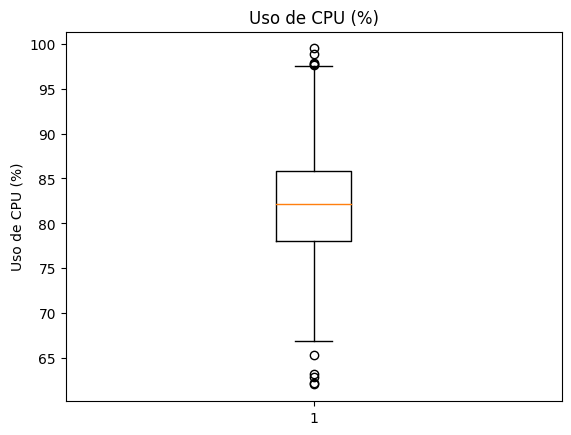

In [15]:
from modules import graphics

box_plot = graphics.get_boxplot(data_set)


### Histograma

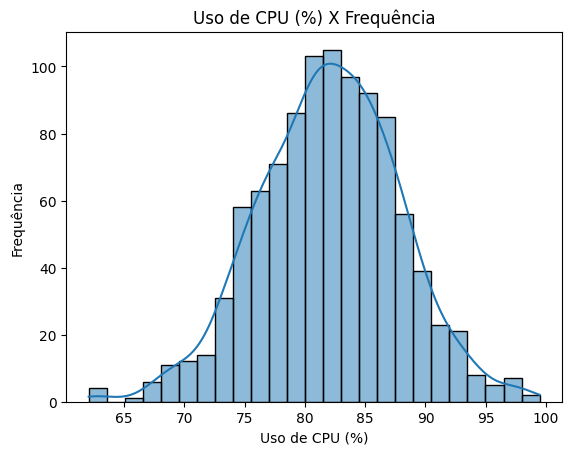

In [16]:
histogram = graphics.get_histograma(data_set)

### Gráfico de linhas

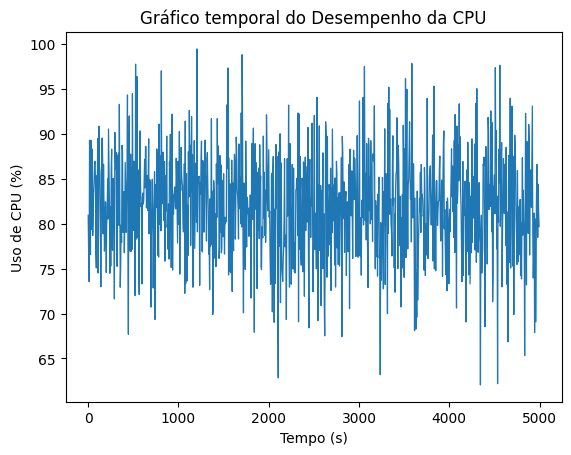

In [17]:
linear_chart = graphics.get_linechart(data_set)